<a href="https://colab.research.google.com/github/lakmg2007/SCALAR_LEARNINGS/blob/main/IndianMovie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

In [7]:
try:
  from google.colab import drive
  print("Running in google colab env")
except:
  print("Running in local env")

Running in google colab env


In [8]:
try:
  movies_df = pd.read_csv('/content/movies.csv')
  print(movies_df.head())
  ratings_df_raw = pd.read_json('ratings.json', lines=True)
  print(ratings_df_raw.head())

  ratings_list = []
  for _,row in ratings_df_raw.iterrows():
    user_id = row['_id']
    if 'rated' in row and isinstance(row['rated'], dict):
        for movie_id, rating_value in row['rated'].items():
          if movie_id != 'submit' and isinstance(rating_value, list) and len(rating_value) > 0:
             try:
              rating = float(rating_value[0])
              if rating == -1:
                rating = 1
              elif rating ==0:
                rating =3
              elif rating == 1:
                rating = 5
              ratings_list.append({
                  'userId': user_id,
                  'movieId': movie_id,
                  'rating': rating
              })
             except:
               pass
  ratings_df = pd.DataFrame(ratings_list)
  print(ratings_df.head())

  users_df = pd.read_csv('users.csv')
  print(users_df.head())
except:
  print("Error in uploading file")

    movie_id  \
0  tt5286444   
1  tt4434004   
2  tt0248126   
3  tt0347304   
4  tt3043252   

                                                                                           description  \
0  Neerja is the story of the courageous Neerja Bhanot, who sacrificed her life while protecting th...   
1  A story that revolves around drug abuse in the affluent north Indian State of Punjab and how the...   
2  Yashvardhan Raichand lives a very wealthy lifestyle along with his wife, Nandini, and two sons, ...   
3  Naina, an introverted, perpetually depressed girl's life changes when she meets Aman. But Aman h...   
4  'Parched' is a story about women set in the heart of parched rural landscape of Rajasthan, India...   

                                     language                  released  \
0                                 [ "Hindi" ]  2016-02-19T00:00:00.000Z   
1                      [ "Hindi", "Panjabi" ]  2016-06-17T00:00:00.000Z   
2              [ "Hindi", "English", "Urd

In [9]:
print("MOVIE DATASET")
print("="*50)
print(f"Shape:{movies_df.shape}")
print(f"\nColumns: {list(movies_df.columns)}")
print("\n First 3 movies:")
movies_df.head(3)

MOVIE DATASET
Shape:(2850, 10)

Columns: ['movie_id', 'description', 'language', 'released', 'rating', 'writer', 'director', 'cast', 'genre', 'name']

 First 3 movies:


,movie_id,description,language,released,rating,writer,director,cast,genre,name
0,tt5286444,"Neerja is the story of the courageous Neerja Bhanot, who sacrificed her life while protecting th...","[ ""Hindi"" ]",2016-02-19T00:00:00.000Z,7.9,"[ ""Saiwyn Quadras"", ""Sanyukta Shaikh Chawla"" ]","[ ""Ram Madhvani"" ]","[ ""Sonam Kapoor"", ""Shabana Azmi"", ""Yogendra Tikku"", ""Abrar Zahoor"", ""Jim Sarbh"", ""Ali Baldiwala""...","[ ""Biography"", ""Drama"", ""Thriller"" ]",Neerja
1,tt4434004,A story that revolves around drug abuse in the affluent north Indian State of Punjab and how the...,"[ ""Hindi"", ""Panjabi"" ]",2016-06-17T00:00:00.000Z,7.9,"[ ""Sudip Sharma"", ""Abhishek Chaubey"" ]","[ ""Abhishek Chaubey"" ]","[ ""Alia Bhatt"", ""Shahid Kapoor"", ""Diljit Dosanjh"", ""Kareena Kapoor"", ""Taran Bajaj"", ""Mansi Jhing...","[ ""Crime"", ""Drama"", ""Thriller"" ]",Udta Punjab
2,tt0248126,"Yashvardhan Raichand lives a very wealthy lifestyle along with his wife, Nandini, and two sons, ...","[ ""Hindi"", ""English"", ""Urdu"" ]",2001-12-14T00:00:00.000Z,7.5,"[ ""Karan Johar"", ""Sheena Parikh"" ]","[ ""Karan Johar"" ]","[ ""Amitabh Bachchan"", ""Jaya Bhaduri"", ""Shah Rukh Khan"", ""Kajol"", ""Hrithik Roshan"", ""Kareena Kapo...","[ ""Drama"", ""Musical"", ""Romance"" ]",Kabhi Khushi Kabhie Gham...


In [10]:
print("RATINGS DATASET")
print("=" *50)
print(f"Shape: {ratings_df.shape}")
print(f"\nColumns: {list(ratings_df.columns)}")
print("\n Rating statistics:")
print(ratings_df['rating'].describe())
print("\n First 5 ratings:")
ratings_df.head()

RATINGS DATASET
Shape: (20652, 3)

Columns: ['userId', 'movieId', 'rating']

 Rating statistics:
count    20652.000000
mean         3.553845
std          1.290447
min          1.000000
25%          3.000000
50%          3.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

 First 5 ratings:


,userId,movieId,rating
0,11megha89,tt0104561,5
1,11megha89,tt0323013,5
2,11megha89,tt2213054,3
3,11megha89,tt1447508,3
4,11megha89,tt4505006,3


In [11]:
print("USERS DATASET")
print("="*50)
print(f"Shape: {users_df.shape}")
print(f"\nColumns: {list(users_df.columns)}")
print("\n User demographics:")
if 'job' in users_df.columns:
  print("\n Job distribution")
  print(users_df['job'].value_counts().head())

if 'state' in users_df.columns:
  print("\n State distribution")
  print(users_df['state'].value_counts().head())
users_df.head()

USERS DATASET
Shape: (924, 6)

Columns: ['_id', 'languages', 'job', 'state', 'dob', 'gender']

 User demographics:

 Job distribution
job
Student          575
Service          198
Self-employed     74
Others            65
Retired           11
Name: count, dtype: int64

 State distribution
state
Delhi             637
Andhra Pradesh     65
Uttar Pradesh      63
Haryana            30
Maharashtra        23
Name: count, dtype: int64


,_id,languages,job,state,dob,gender
0,11megha89,"[ ""Hindi"" ]",Student,Haryana,18-04-1989,Female
1,2ez4nimzi,"[ ""Hindi"" ]",Student,Delhi,16-06-2000,Male
2,9953547227,"[ ""Hindi"" ]",Student,Delhi,06-09-1998,Male
3,9958221803,"[ ""Hindi"" ]",Student,Delhi,09-09-1996,Male
4,ABCDEFGHI JKLM,"[ ""Hindi"" ]",Service,Delhi,26-01-1960,Male


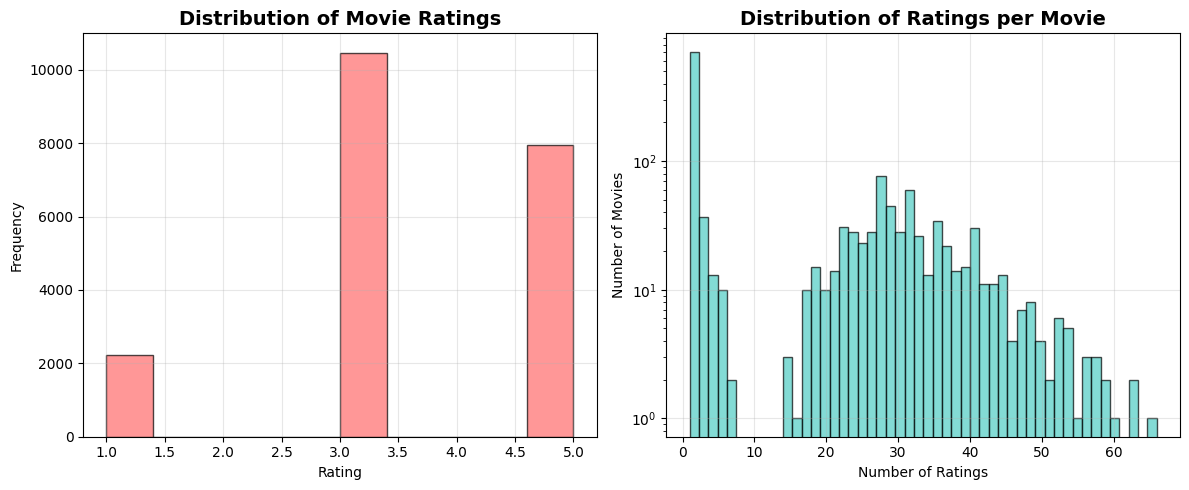

In [12]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
ratings_df['rating'].hist(bins=10,edgecolor='black',alpha=0.7,color='#FF6B6B')
plt.title('Distribution of Movie Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True,alpha=0.3)

plt.subplot(1,2,2)
ratings_per_movie = ratings_df.groupby('movieId').size()
plt.hist(ratings_per_movie, bins=50,edgecolor='black',alpha=0.7, color='#4ECDC4')
plt.title('Distribution of Ratings per Movie', fontsize=14, fontweight='bold')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



# **Content-Based Filtering**





In [13]:
print("Available movie features:")
for col in movies_df.columns:
  print(f"- {col}: {movies_df[col].dtype}")
  if movies_df[col].dtype == 'object' and col != 'movie_id':
    print(f" Sample: {str(movies_df[col].iloc[0])[:100]}...")
    print()

Available movie features:
- movie_id: object
- description: object
 Sample: Neerja is the story of the courageous Neerja Bhanot, who sacrificed her life while protecting the li...

- language: object
 Sample: [ "Hindi" ]...

- released: object
 Sample: 2016-02-19T00:00:00.000Z...

- rating: float64
- writer: object
 Sample: [ "Saiwyn Quadras", "Sanyukta Shaikh Chawla" ]...

- director: object
 Sample: [ "Ram Madhvani" ]...

- cast: object
 Sample: [ "Sonam Kapoor", "Shabana Azmi", "Yogendra Tikku", "Abrar Zahoor", "Jim Sarbh", "Ali Baldiwala", "V...

- genre: object
 Sample: [ "Biography", "Drama", "Thriller" ]...

- name: object
 Sample: Neerja...



In [14]:
movies_df = movies_df.fillna('')
movies_df['movieId'] = movies_df['movie_id']

def clean_list_string(s):
  if isinstance(s, str):
    s = s.replace('[', '').replace(']', '').replace('"', '').replace("'", '')
    return s.strip()
  return str(s)

movies_df['combined_features'] = ''

if 'name' in movies_df.columns:
  movies_df['combined_features'] += movies_df['name'].astype(str) + ' '

if 'genre' in movies_df.columns:
  movies_df['combined_features'] += movies_df['genre'].apply(clean_list_string) + ' '

if 'cast' in movies_df.columns:
  movies_df['combined_features'] += movies_df['cast'].apply(clean_list_string) + ' '

# Add director
if 'director' in movies_df.columns:
    movies_df['combined_features'] += movies_df['director'].apply(clean_list_string) + ' '

# Add description
if 'description' in movies_df.columns:
    movies_df['combined_features'] += movies_df['description'].astype(str)

movies_df['combined_features'] += movies_df['combined_features'].str.strip()

print("Samplecombined features:")
for i in range(min(3, len(movies_df))):
  print(f"\nMovie {i+1}: {movies_df['name'].iloc[i]}")
  print(f"Features: {movies_df['combined_features'].iloc[i][:200]}...")



Samplecombined features:

Movie 1: Neerja
Features: Neerja Biography, Drama, Thriller Sonam Kapoor, Shabana Azmi, Yogendra Tikku, Abrar Zahoor, Jim Sarbh, Ali Baldiwala, Vikrant Singta, Kirti Adarkar, Parth Akerkar, Hayder Ali, Arjun Aneja, Bobby Arora...

Movie 2: Udta Punjab
Features: Udta Punjab Crime, Drama, Thriller Alia Bhatt, Shahid Kapoor, Diljit Dosanjh, Kareena Kapoor, Taran Bajaj, Mansi Jhingran, Satish Kaushik, Suhail Nayyar, Rajesh Kumar Sharma, Harpreet Singh, Prabhjyot...

Movie 3: Kabhi Khushi Kabhie Gham...
Features: Kabhi Khushi Kabhie Gham... Drama, Musical, Romance Amitabh Bachchan, Jaya Bhaduri, Shah Rukh Khan, Kajol, Hrithik Roshan, Kareena Kapoor, Rani Mukerji, Farida Jalal, Alok Nath, Johnny Lever, Himani S...


In [15]:
tfidf = TfidfVectorizer(
    stop_words='english',


)
tfidf_matrix = tfidf.fit_transform(movies_df['combined_features'])
print(f"TFIDF shape: {tfidf_matrix.shape}")
print(f"No of Movies: {tfidf_matrix.shape[0]}")
print(f"No of features: {tfidf_matrix.shape[1]}")



TFIDF shape: (2850, 19439)
No of Movies: 2850
No of features: 19439


In [16]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)

print(f"Similarity matrix shapeL {cosine_sim.shape}")
print(f"Min sim:{cosine_sim[0].min():.3f}")
print(f"Max sim:{cosine_sim[0].max():.3f}")
print(f"Mean sim:{cosine_sim[0].mean():.3f}")


Similarity matrix shapeL (2850, 2850)
Min sim:0.000
Max sim:1.000
Mean sim:0.006


In [17]:
def get_content_based_recommendations(movie_title, movies_df, cosine_sim,n_recommendations=10):
  try:
    idx = movies_df[movies_df['name'].str.contains(movie_title, case=False)].index[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:n_recommendations+1]]

    recommendations = movies_df.iloc[movie_indices][['movieId','name','genre']].copy()
    recommendations['similarity_score'] = [score[1] for score in sim_scores[1:n_recommendations+1]]
    return recommendations
  except IndexError:
    print(f"{movie_title} Not found in database")
    return pd.DataFrame()


In [18]:
test_movie =movies_df['name'].iloc[0]
print(f"{test_movie}")

recommendations = get_content_based_recommendations(test_movie,movies_df, cosine_sim )
recommendations

Neerja


,movieId,name,genre,similarity_score
96,tt5805252,Budhia Singh: Born to Run,"[ ""Biography"", ""Drama"", ""Sport"" ]",0.079517
107,tt0347332,Khakee,"[ ""Action"", ""Adventure"", ""Drama"" ]",0.059487
1957,tt3954068,Enakkul Oru Devathai,"[ ""Family"" ]",0.057065
391,tt0077783,Junoon,"[ ""Drama"" ]",0.056980
324,tt5513098,Autohead,"[ ""Crime"", ""Drama"" ]",0.056034
494,tt0293589,Shaheed,"[ ""Biography"", ""Drama"", ""History"" ]",0.055881
1270,tt1608777,"LSD: Love, Sex Aur Dhokha","[ ""Comedy"", ""Crime"", ""Drama"" ]",0.054789
629,tt1961143,...EBONG KANNA,"[ ""Drama"", ""Western"" ]",0.050782
583,tt0350005,Pyaar Ki Jeet,"[ ""Comedy"", ""Drama"", ""Musical"" ]",0.050742
2625,tt2358592,Lucia,"[ ""Drama"", ""Romance"", ""Sci-Fi"" ]",0.049544


In [19]:
user_item_matrix = ratings_df.pivot_table(
    index='userId',
    columns='movieId',
    values='rating',
    fill_value=0
)

print(f"✅ User-Item matrix shape: {user_item_matrix.shape}")
print(f"Number of users: {user_item_matrix.shape[0]}")
print(f"Number of movies: {user_item_matrix.shape[1]}")
print(f"Sparsity: {(user_item_matrix == 0).sum().sum() / (user_item_matrix.shape[0] * user_item_matrix.shape[1]) * 100:.2f}%")

✅ User-Item matrix shape: (757, 1382)
Number of users: 757
Number of movies: 1382
Sparsity: 98.03%


In [20]:
user_item_matrix

movieId         tt0028626  tt0031829  tt0032836  tt0036077  tt0040067  \
userId                                                                  
11megha89             0.0        0.0        0.0        0.0        0.0   
9953547227            0.0        0.0        0.0        0.0        0.0   
ABCDEFGHI JKLM        0.0        0.0        0.0        0.0        0.0   
ANAND                 0.0        0.0        0.0        0.0        0.0   
Aakanksha             0.0        0.0        0.0        0.0        0.0   
...                   ...        ...        ...        ...        ...   
yagami_kunal          0.0        0.0        0.0        0.0        0.0   
yajur16121            0.0        0.0        0.0        0.0        0.0   
yomojet               0.0        0.0        0.0        0.0        0.0   
yusuf                 0.0        0.0        0.0        0.0        0.0   
zainab                0.0        0.0        0.0        0.0        0.0   

movieId         tt0041123  tt0042329  tt0043307  tt0043908  tt0044360  \
userId                                                                  
11megha89             0.0        0.0        0.0        0.0        0.0   
9953547227            0.0        0.0        0.0        0.0        0.0   
ABCDEFGHI JKLM        0.0        0.0        0.0        0.0        0.0   
ANAND                 0.0        0.0        0.0        0.0        0.0   
Aakanksha             0.0        0.0        0.0        0.0        0.0   
...                   ...        ...        ...        ...        ...   
yagami_kunal          0.0        0.0        0.0        0.0        0.0   
yajur16121            0.0        0.0        0.0        0.0        0.0   
yomojet               0.0        0.0        0.0        0.0        0.0   
yusuf                 0.0        0.0        0.0        0.0        0.0   
zainab                0.0        0.0        0.0        0.0        0.0   

movieId         tt0045506  tt0045528  tt0045693  tt0046155  tt0046176  \
userId                                                                  
11megha89             0.0        0.0        0.0        0.0        0.0   
9953547227            0.0        0.0        0.0        0.0        0.0   
ABCDEFGHI JKLM        0.0        0.0        0.0        0.0        0.0   
ANAND                 0.0        0.0        0.0        0.0        0.0   
Aakanksha             0.0        0.0        0.0        3.0        0.0   
...                   ...        ...        ...        ...        ...   
yagami_kunal          0.0        0.0        0.0        0.0        0.0   
yajur16121            0.0        0.0        0.0        0.0        0.0   
yomojet               5.0        0.0        0.0        0.0        0.0   
yusuf                 0.0        0.0        0.0        0.0        0.0   
zainab                0.0        0.0        0.0        0.0        0.0   

movieId         tt0046304  tt0047990  tt0048537  tt0048987  tt0049041  \
userId                                                                  
11megha89             0.0        0.0        0.0        0.0        0.0   
9953547227            0.0        0.0        0.0        0.0        0.0   
ABCDEFGHI JKLM        0.0        0.0        0.0        0.0        0.0   
ANAND                 0.0        0.0        0.0        3.0        0.0   
Aakanksha             0.0        5.0        0.0        0.0        0.0   
...                   ...        ...        ...        ...        ...   
yagami_kunal          0.0        0.0        0.0        0.0        0.0   
yajur16121            0.0        0.0        0.0        0.0        0.0   
yomojet               0.0        0.0        0.0        0.0        0.0   
yusuf                 0.0        0.0        0.0        0.0        0.0   
zainab                0.0        0.0        0.0        0.0        0.0   

movieId         tt0049072  tt0049378  tt0049393  tt0049643  tt0049752  \
userId                                                                  
11megha89             0.0        0.0        0.0       

In [21]:
print("👥 Calculating user-user similarity...")

# For computational efficiency, we'll work with a subset if dataset is large
if user_item_matrix.shape[0] > 1000:
    print("⚠️ Large dataset detected. Using subset for demonstration...")
    sample_users = np.random.choice(user_item_matrix.index, 500, replace=False)
    user_item_subset = user_item_matrix.loc[sample_users]
else:
    user_item_subset = user_item_matrix

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_subset)
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_item_subset.index,
    columns=user_item_subset.index
)

print(f"✅ User similarity matrix shape: {user_similarity_df.shape}")

👥 Calculating user-user similarity...
✅ User similarity matrix shape: (757, 757)


In [22]:
user_similarity_df

userId,11megha89,9953547227,ABCDEFGHI JKLM,ANAND,Aakanksha,Aakash,Aakash22,Aashisha,Aayushi,Abhijeet Mishra,Abhimanyu Tanwar,Abhishek,Abhishek Gupta,Aditipathak,Aditya,Afsha shah,Ahmad,Ajay,Ajay12,Ajay1998,Akanksha,Akanksha Mishra,Akansha,Akash28,Akash869,Akshat,Alka,AlkaGupta,Alok Singh,Amandeep,Amitjain,Anil Marwah,Anil kumar,Anita Goel,AnjaliUjjainia,Anju,Ankur Rastogi,Ankur Sharma,Anmol18,Anshul,Anshuman Suri,Anubhav,Anudita,Anuprriya,Anusha Raj,Anvit,Any,Apoorv,Apurupa,Arashdeep Kaur,Archana,Arjun13022,Arnav Kumar,Arun,Arun Garg,Arun Kumar Gupta,Ashish07,Ashish16021,Ashish_16,Ashok,Ashok Kumar,Ashutosh Brahma,Astitv,Avadh,Avdesh Kumar,Avinash,Avneet,Aysha,Ayush Raj Mehrotra,Bharat70,Bhaskarverma725,BhatiaCo,Bhawani,Bhuwan Pathak,Bijla_Rana,BlueO,Ch1ck3n65,Champa72,Chanchal,Chanderkala,Cheerag1,Cheerag7,Cheffy,Chita Chidambaram,Cloak98,CoolSatyam,Cosmopal,D.Saksham,D1,Daljeet,Deadpool2,Dee,Deeksha,Deepak,Deepak _ca2004,Deepti,Deepu singh,Devi Prasad jena,Dewangee,Dhruv Bhagat,Diadem98,Dimpi,Dimple,Divya,Divya95,Dush,Ekta,Erised98,Faiz,Fazilath,Feeroz Ahmed,Gaurav sharma,Gautam,Geeta,Ginnik,Gita,Gitasharma,Gotuhell,Gunkirat,Guruji_Deadpool,Harjeet,Harsh,Harshit panwar,Hasan Jawaid Khan,Haseena,Hedwig30,Himanshi,Himanshu Sharma,Hina,Hina,Holmesfan,Ishaan Bassi,JKLM ABCDEFGHI,Jasbir panwar,KIRA,Kanika,Kanupriya Dang,Kapeesh,Karish08,Karunakar Singh,Kasturi,Khan,Khushi,Kiran,Krishna,Kunal,Kundan,LATA007,Lakshya,Lalitha,Lekh Raj,Lokender Singh,LovedeepChhokra,M H Akhtar,Madan,MaddyThakker,Madhav,Madhav Goel,Madhav Thakker,MadhurV9784,Mahi,Mahima Verma,MalikMishra,Manas,Manish,Manmeet,Manveer__Rana,Meenakshi Garg,Megha,Mkverma,Mona,Mr.CA005,MrCruiser,Mrakash,Mudit goel,Mugen,Mukesh_Rawat,Mukki_Rana,Munish,NAKUL,NSB64,NSB64_,Nakul,Nakul lawaria,Namrata13065,Nandini,Naresh,NareshJain,Naveenchd,Nawazish,Nbhatia,Neera,Neeti Arora,Neetu,Neetu Singh,Neha Sharma,Nepun Suneja,Nilesh,Nishad Bhelekar,Nitin Kumar,Nitin13070,Om Prakash,Pkaksha,Poonamsaini,Pradeep Sharma,Prakashb,Pramod_Agg,Pramodh,PrateekSingh,Preeti,PremL,Prince patel,Priya15073,Priysha20,Protichi,REVERB283,Raghav,Raghav Verma,Raghav1,Raghavv,Rahul,Rahul Bansal,Raj Kamal,Raj Kumar,Rajesh,Rajesh Bhagat,RajeshVerma,Rajni Gupta,Rakesh123,Ralph,Ram,Ramanathan,Rashi.prakash8,Ratan,Redusa,Richa,Richa Goel,RichaGoswami,RichaS7,RishabhGoswami,Rishi,Ritu,Ritvik13078,Rohit,Roshan,Rosy,Rsc98,Rsh2ada,S P,S P Sharma,SSSharma,SSingh1402,Sagar Verma,Sahil Vaid,Sai Sabitha,SaiKiran,Saksham,Saksham Gupta,Sameer Khan,Sandeeps,Sangita_1001,Sanjay,Sanjay Kumar,Sanjiv,SankaLp,Santosh,Sarang,Sarthak Aditya,Satish,Satyam choudhary,Satyam007,Saurabh,Sautan Sharma,Savita,Savitaverma,Shahab,Shaloo,Shanky,Sharmistha Gupta,Shashi,Sheeba Naqvi,Shilpa,Shinu,Shivani,Shivin,Shivkseth,Shravika,Shreetama,Shreshtha singhal,Shreyas,Shruti,ShubhamGoswami,Shubhra,Shweta,Shweta Rana,Shweta2206,Shyam,Siddhi singhal,Simran,Sm,Snigdha,Sooraj,Sraj,Srattan98,Srishti,Ss2195,Sunil kumar,Sunita,Sunny110051,Surabhi,Suraj,Suraj Prathik Kumar,Swatilekha Majumdar,Sweta_Chhokra,Switi,Taejas,Tanish,The mysterious,Umashankar,Umesh Gupta,Utkarsh,Utkarsh Kohli,Vaibhav Dang,Vanshika gupta,Varshasharma,Vartika,Vatsala Arora,Vedant,Vedant1,Vedant2,Venu,Vijay,Vikas,VikashKumandan,Vipin Goel,Vishal Hooda,Vishal711,VishalS711,VishalSR711,Vishwas,WadeWilson,Yashu,Yatendra,Yogesh,YuvraJ Sharma,Zirgham,Zoha,aakash16215,aakashjoshi,aayush9,abdulkhan,abhi,abhim51,abhimanyu,abhishek13005,abhishek16006,abhishek2309,acckoul,achala.sharma25,achetan40,adarsh_007,adinehria,aditya16008,aditya16127,adityas114,adiv12,afzal ahemad,agarwal_a,agrawalamod,aishwarya,aishwarya14130,ajay1967,ajit,ak.shinde09,akaReddy,akanksha,akif.khan,akshat14132,alpna,aman,amandeep,amar,amit010dalel,ampk349,anandita9988,anant3110,anildhawan,anjali9899,anjaniarnav,ankit sharma,ankushvarma12,anmol89,anoop,anshika,anshul,anshumanprakash123,anubha,anujrawal,anurag,anushka16134,anvitmangal,appu250,aprajita1964,archana,archanag,arp229,arpana,arsh25,arun,arun gaba,arunp,arush